## Import libraries

In [5]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

import math

## Get Data

In [6]:
import sys  
sys.path.insert(0, "/home/molisa/python_projects/high_frequency_large_data")

In [8]:
from src.backend.get_data.yahoo_finance import get_data
# from src.backend.yahoo_finance import get_data

df = get_data("yahoo_finance")

In [9]:
df.head()

,Date,Open,High,Low,Close,Volume,Dividends,Stock Splits,company
0,2020-11-13 05:00:00+00:00,136.949997,137.509995,133.886673,136.166672,59313300,0.0,0.0,TSLA
1,2020-11-16 05:00:00+00:00,136.309998,137.483337,134.696671,136.029999,80515800,0.0,0.0,TSLA
2,2020-11-17 05:00:00+00:00,153.389999,154.000000,144.336670,147.203339,183564900,0.0,0.0,TSLA
3,2020-11-18 05:00:00+00:00,149.449997,165.333328,147.833328,162.213333,234132000,0.0,0.0,TSLA
4,2020-11-19 05:00:00+00:00,164.000000,169.536667,162.523331,166.423340,187425900,0.0,0.0,TSLA


In [10]:
def extract_date_features(dataframe):
    """
    Get a dataframe with a string for Date and convert it to a datetime and then
    extract the year, month, date, and convert the Hour column which is an 
    integer into a categorical variable.
    """
    dataframe['Date'] = pd.to_datetime(dataframe['Date'],format="%d/%m/%Y")
    # dataframe['day_night'] = dataframe['Hour'].apply(lambda x : 'Night' if (x >20 or x<5) else( 'Day'))
    # dataframe['day_of_week'] =  dataframe["Date"].dt.dayofweek
    dataframe['Day'] = dataframe['Date'].dt.day
    dataframe['Month'] = dataframe['Date'].dt.month
    dataframe["Year"] = dataframe['Date'].map(lambda x: x.year).astype("object")
    # dataframe.drop(columns=['Date'],inplace=True)
    return dataframe

In [13]:
df = extract_date_features(df)

In [14]:
df.head()

,Date,Open,High,Low,Close,Volume,Dividends,Stock Splits,company,Day,Month,Year
0,2020-11-13 05:00:00+00:00,136.949997,137.509995,133.886673,136.166672,59313300,0.0,0.0,TSLA,13,11,2020
1,2020-11-16 05:00:00+00:00,136.309998,137.483337,134.696671,136.029999,80515800,0.0,0.0,TSLA,16,11,2020
2,2020-11-17 05:00:00+00:00,153.389999,154.000000,144.336670,147.203339,183564900,0.0,0.0,TSLA,17,11,2020
3,2020-11-18 05:00:00+00:00,149.449997,165.333328,147.833328,162.213333,234132000,0.0,0.0,TSLA,18,11,2020
4,2020-11-19 05:00:00+00:00,164.000000,169.536667,162.523331,166.423340,187425900,0.0,0.0,TSLA,19,11,2020


In [15]:
df.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6864 entries, 0 to 6863
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype              
---  ------        --------------  -----              
 0   Date          6864 non-null   datetime64[ns, UTC]
 1   Open          6864 non-null   float64            
 2   High          6864 non-null   float64            
 3   Low           6864 non-null   float64            
 4   Close         6864 non-null   float64            
 5   Volume        6864 non-null   int64              
 6   Dividends     6864 non-null   float64            
 7   Stock Splits  6864 non-null   float64            
 8   company       6864 non-null   object             
 9   Day           6864 non-null   int32              
 10  Month         6864 non-null   int32              
 11  Year          6864 non-null   object             
dtypes: datetime64[ns, UTC](1), float64(6), int32(2), int64(1), object(2)
memory usage: 590.0+ KB


In [16]:
df.describe(include='all').T

,count,unique,top,freq,mean,min,25%,50%,75%,max,std
Date,6864,NaN,NaN,NaN,2022-02-14 17:09:28.006992896+00:00,2020-11-13 05:00:00+00:00,2021-07-05 04:00:00+00:00,2022-02-14 17:00:00+00:00,2022-09-28 10:00:00+00:00,2023-05-12 04:00:00+00:00,NaN
Open,6864.0,NaN,NaN,NaN,77.490511,2.86,9.83,44.935001,131.25,411.470001,78.074483
High,6864.0,NaN,NaN,NaN,78.876478,2.89,10.1,45.98,132.877042,414.496674,79.505592
Low,6864.0,NaN,NaN,NaN,76.02132,2.73,9.592319,43.650002,129.192441,405.666656,76.507492
Close,6864.0,NaN,NaN,NaN,77.462963,2.82,9.82,44.945,130.788002,409.970001,78.024771
Volume,6864.0,NaN,NaN,NaN,53748968.196387,290200.0,26577600.0,42974850.0,70731925.0,666378600.0,39542971.482165
Dividends,6864.0,NaN,NaN,NaN,0.00175,0.0,0.0,0.0,0.0,2.59,0.047665
Stock Splits,6864.0,NaN,NaN,NaN,0.006265,0.0,0.0,0.0,0.0,20.0,0.343277
company,6864,11,TSLA,627,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Day,6864.0,NaN,NaN,NaN,15.613345,1.0,8.0,16.0,23.0,31.0,8.765401


In [27]:
df["company"].nunique()

11

In [28]:
print(pd.unique(df["company"]))

['TSLA' 'PLTR' 'AMD' 'AMZN' 'SOFI' 'NIO' 'AAPL' 'GOOGL' 'PBR' 'UBER' 'SWN']


In [36]:
df_vwap = df[["Date", "Volume", "company"]]  # .where(df.company > "TSLA")

In [37]:
df_vwap.head()

,Date,Volume,company
0,2020-11-13 05:00:00+00:00,59313300,TSLA
1,2020-11-16 05:00:00+00:00,80515800,TSLA
2,2020-11-17 05:00:00+00:00,183564900,TSLA
3,2020-11-18 05:00:00+00:00,234132000,TSLA
4,2020-11-19 05:00:00+00:00,187425900,TSLA


In [57]:
df_vwap_tsla = df_vwap[["Date", "Volume"]].where(df_vwap.company == "TSLA")
df_vwap_tsla.dropna(inplace=True)
df_vwap_tsla = extract_date_features(df_vwap_tsla)

In [58]:
df_vwap_tsla.shape

(627, 5)

In [59]:
df_vwap_tsla.head()

,Date,Volume,Day,Month,Year
0,2020-11-13 05:00:00+00:00,59313300.0,13,11,2020
1,2020-11-16 05:00:00+00:00,80515800.0,16,11,2020
2,2020-11-17 05:00:00+00:00,183564900.0,17,11,2020
3,2020-11-18 05:00:00+00:00,234132000.0,18,11,2020
4,2020-11-19 05:00:00+00:00,187425900.0,19,11,2020


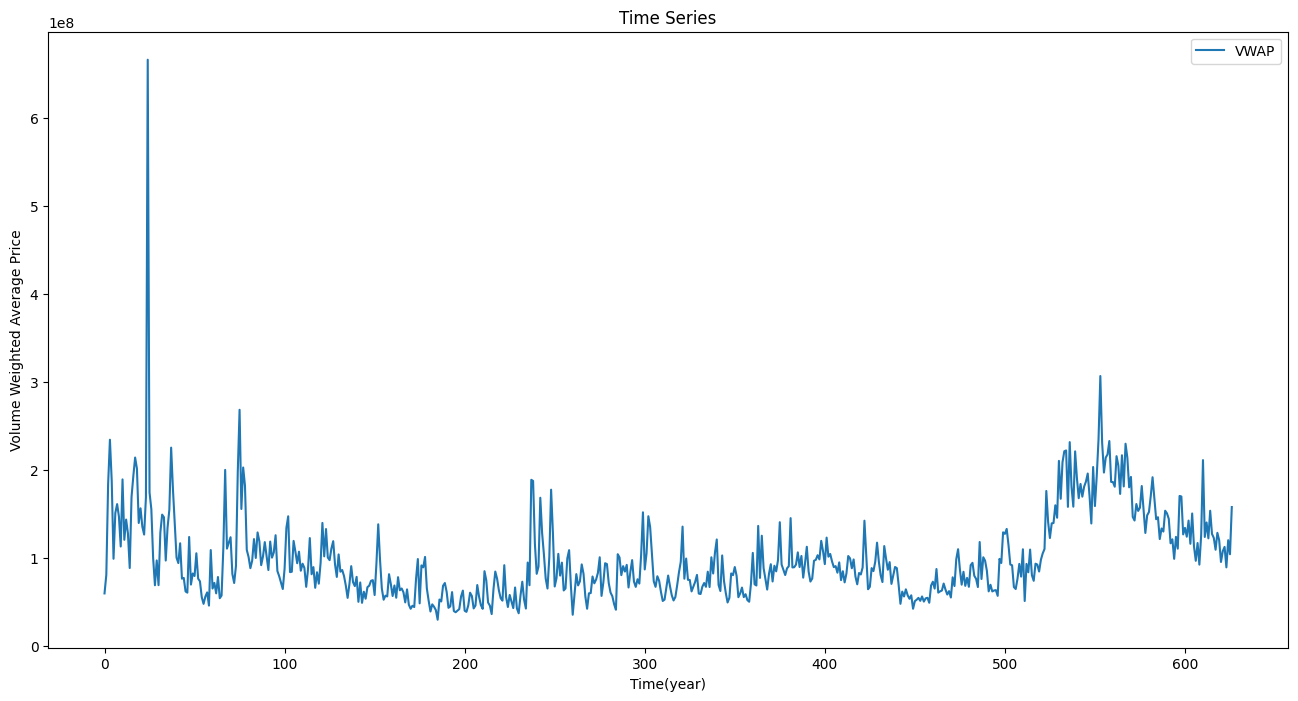

In [67]:
# Visualising the VWAP 

plt.figure(figsize=(16,8)) 
plt.plot(df_vwap_tsla['Volume'], label='VWAP') 
plt.title('Time Series') 
plt.xlabel("Time(year)") 
plt.ylabel("Volume Weighted Average Price") 
plt.legend(loc='best')

<Axes: xlabel='Year'>

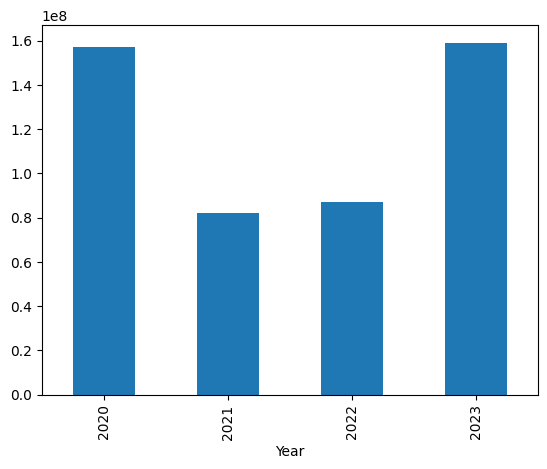

In [76]:
# Yearly VWAP of Maruti Stocks

df_vwap_tsla.groupby('Year')['Volume'].mean().plot.bar()

<Axes: xlabel='Month'>

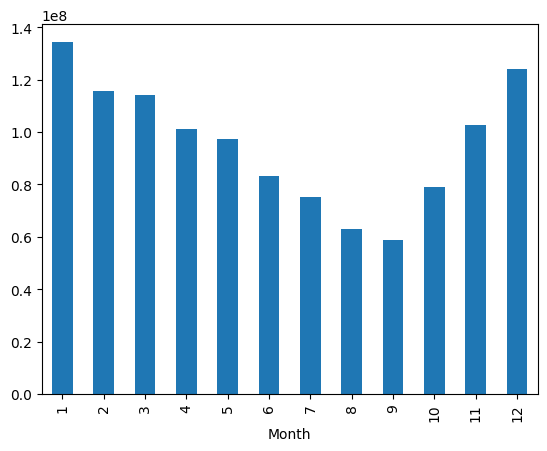

In [84]:
# Yearly VWAP of Maruti Stocks

df_vwap_tsla.groupby('Month')['Volume'].mean().plot.bar()

* [offset-aliases](https://pandas.pydata.org/pandas-docs/stable/user_guide/timeseries.html#offset-aliases)

In [ ]:
df_vwap_tsla['Volume'].resample('A').mean().plot(kind='bar',figsize = (10,4))
plt.title('Yearly Mean VWAP for Maruti')

In [60]:
df_vwap_pltr = df_vwap[["Date", "Volume"]].where(df_vwap.company == "PLTR")
df_vwap_pltr.dropna(inplace=True)
df_vwap_pltr = extract_date_features(df_vwap_pltr)

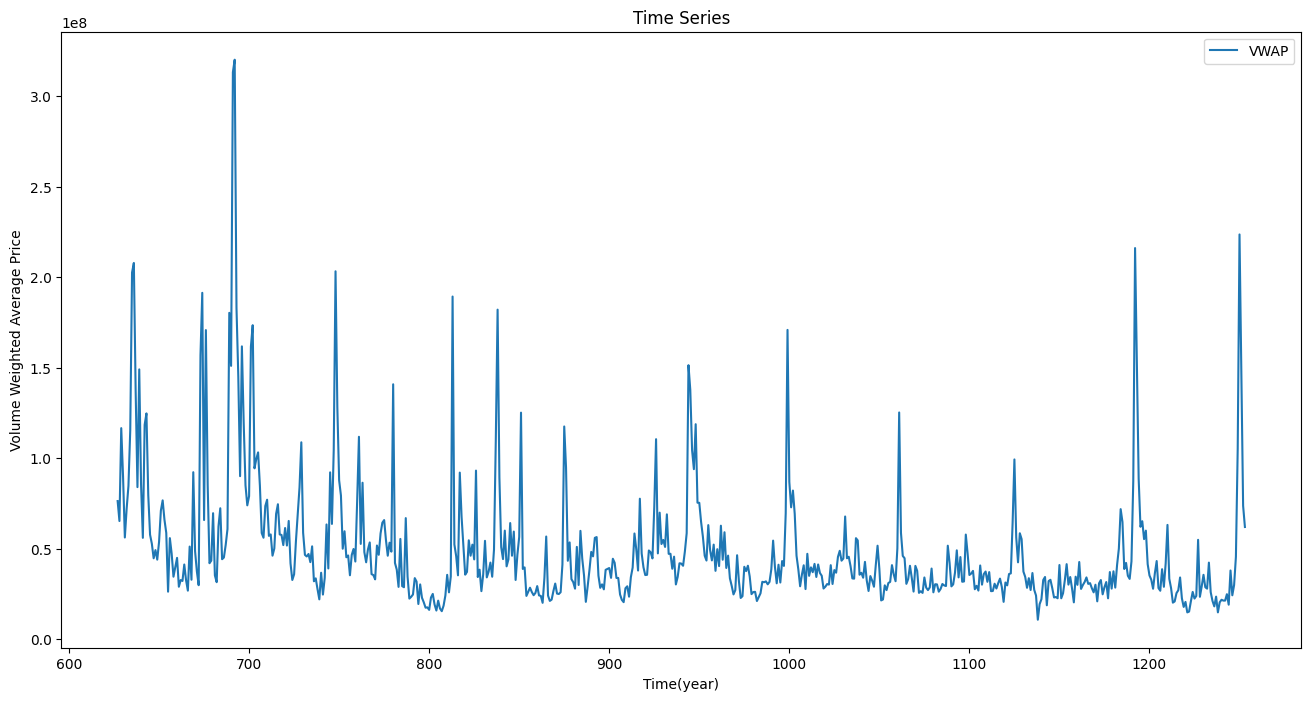

In [69]:
# Visualising the VWAP 

plt.figure(figsize=(16,8)) 
plt.plot(df_vwap_pltr['Volume'], label='VWAP') 
plt.title('Time Series') 
plt.xlabel("Time(year)") 
plt.ylabel("Volume Weighted Average Price") 
plt.legend(loc='best')

<Axes: xlabel='Year'>

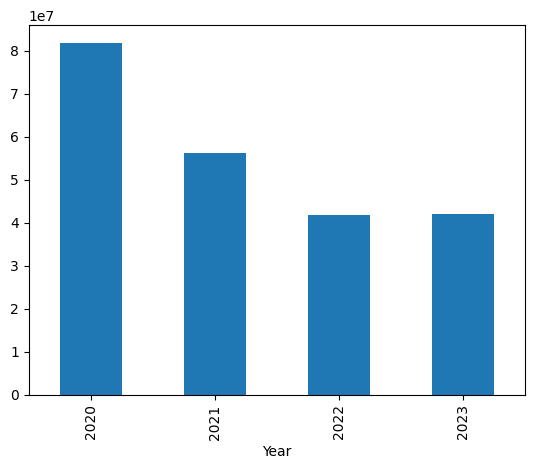

In [77]:
# Yearly VWAP of Maruti Stocks

df_vwap_pltr.groupby('Year')['Volume'].mean().plot.bar()

<Axes: xlabel='Month'>

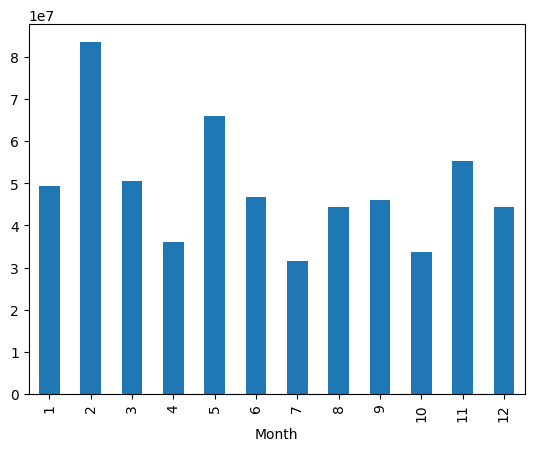

In [85]:
# Monthly VWAP of Maruti Stocks

df_vwap_pltr.groupby('Month')['Volume'].mean().plot.bar()

In [61]:
df_vwap_amd = df_vwap[["Date", "Volume"]].where(df_vwap.company == "AMD")
df_vwap_amd.dropna(inplace=True)
df_vwap_amd = extract_date_features(df_vwap_amd)

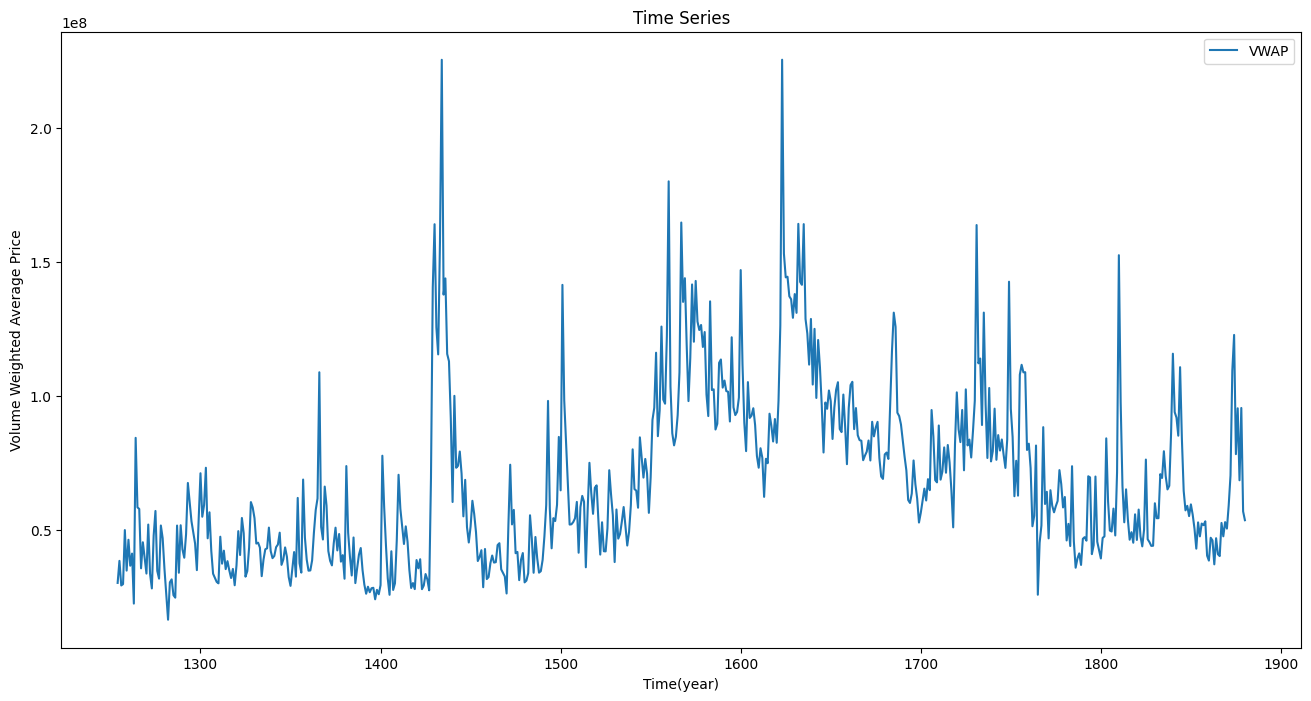

In [70]:
# Visualising the VWAP 

plt.figure(figsize=(16,8)) 
plt.plot(df_vwap_amd['Volume'], label='VWAP') 
plt.title('Time Series') 
plt.xlabel("Time(year)") 
plt.ylabel("Volume Weighted Average Price") 
plt.legend(loc='best')

<Axes: xlabel='Year'>

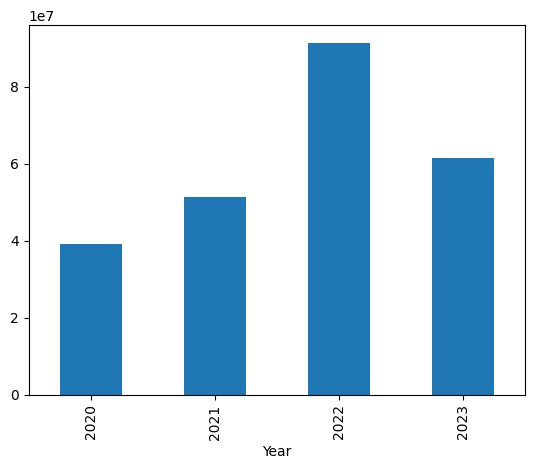

In [78]:
# Yearly VWAP of Maruti Stocks

df_vwap_amd.groupby('Year')['Volume'].mean().plot.bar()

<Axes: xlabel='Month'>

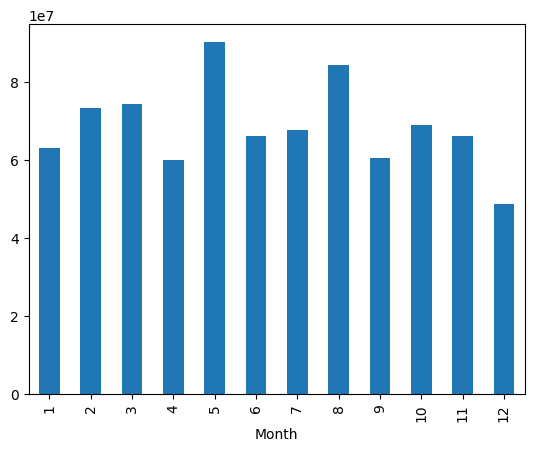

In [87]:
# Month VWAP of Maruti Stocks

df_vwap_amd.groupby('Month')['Volume'].mean().plot.bar()

In [62]:
df_vwap_amzn = df_vwap[["Date", "Volume"]].where(df_vwap.company == "AMZN")
df_vwap_amzn.dropna(inplace=True)
df_vwap_amzn = extract_date_features(df_vwap_amzn)

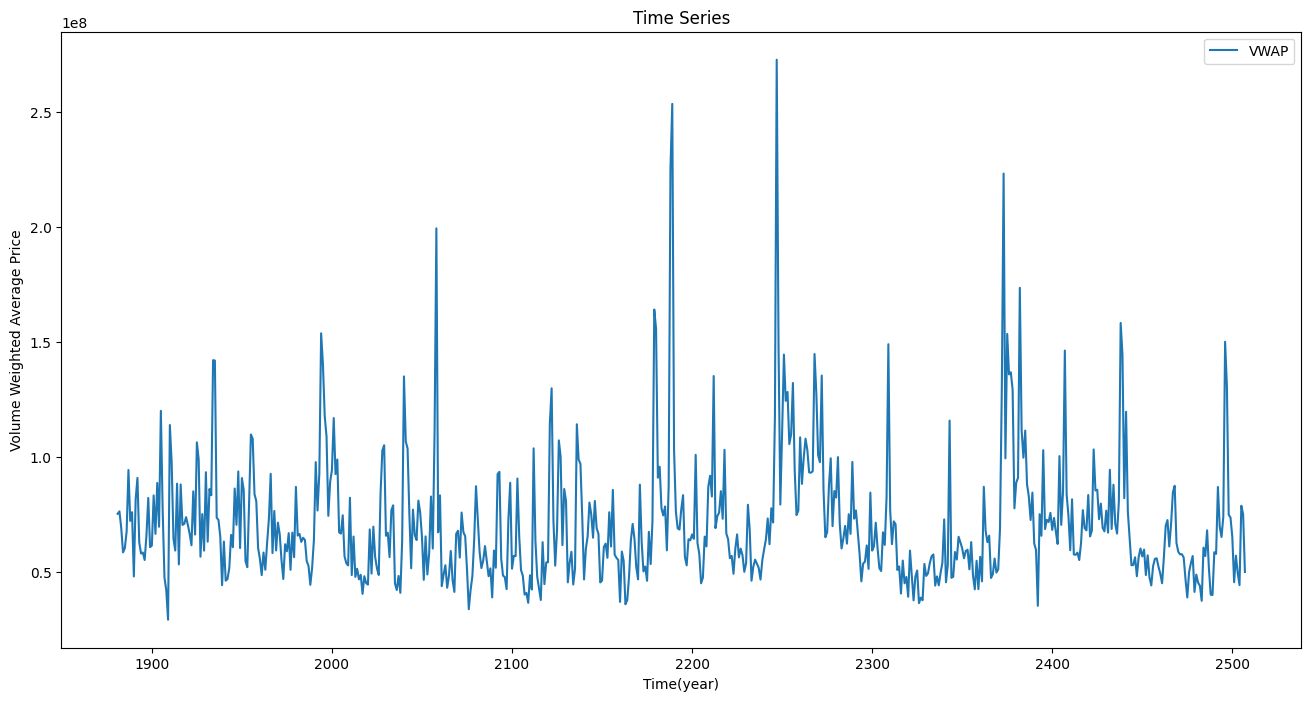

In [71]:
# Visualising the VWAP 

plt.figure(figsize=(16,8)) 
plt.plot(df_vwap_amzn['Volume'], label='VWAP') 
plt.title('Time Series') 
plt.xlabel("Time(year)") 
plt.ylabel("Volume Weighted Average Price") 
plt.legend(loc='best')

<Axes: xlabel='Year'>

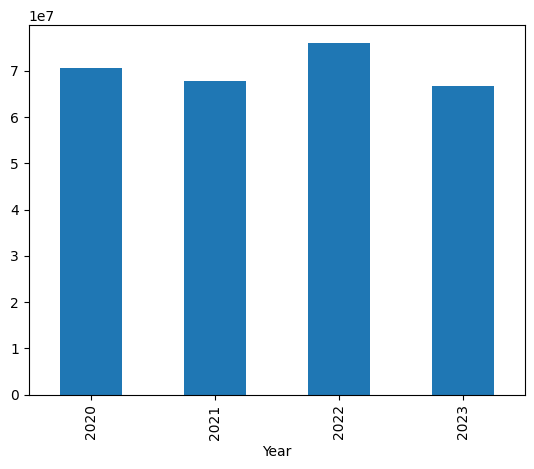

In [79]:
# Yearly VWAP of Maruti Stocks

df_vwap_amzn.groupby('Year')['Volume'].mean().plot.bar()

<Axes: xlabel='Month'>

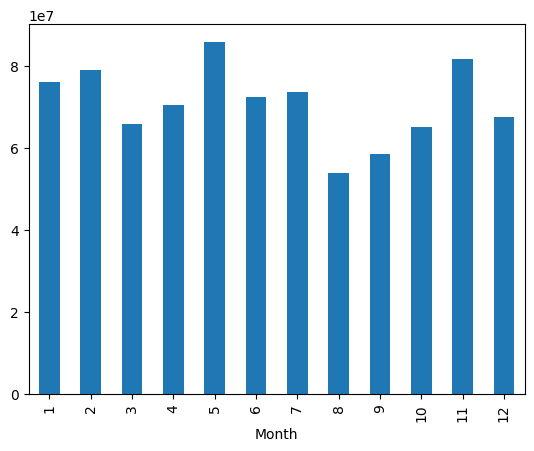

In [88]:
# Yearly VWAP of Maruti Stocks

df_vwap_amzn.groupby('Month')['Volume'].mean().plot.bar()

In [63]:
df_vwap_sofi = df_vwap[["Date", "Volume"]].where(df_vwap.company == "SOFI")
df_vwap_sofi.dropna(inplace=True)
df_vwap_sofi = extract_date_features(df_vwap_sofi)

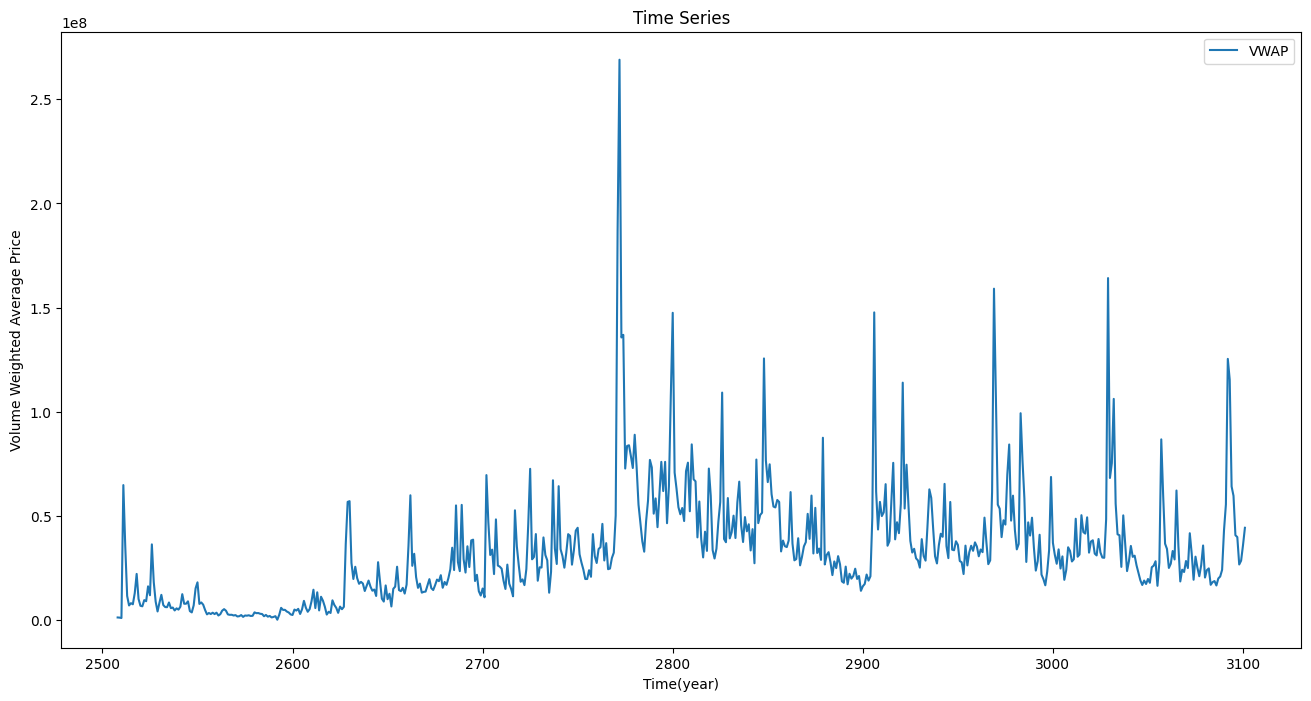

In [72]:
# Visualising the VWAP 

plt.figure(figsize=(16,8)) 
plt.plot(df_vwap_sofi['Volume'], label='VWAP') 
plt.title('Time Series') 
plt.xlabel("Time(year)") 
plt.ylabel("Volume Weighted Average Price") 
plt.legend(loc='best')

<Axes: xlabel='Year'>

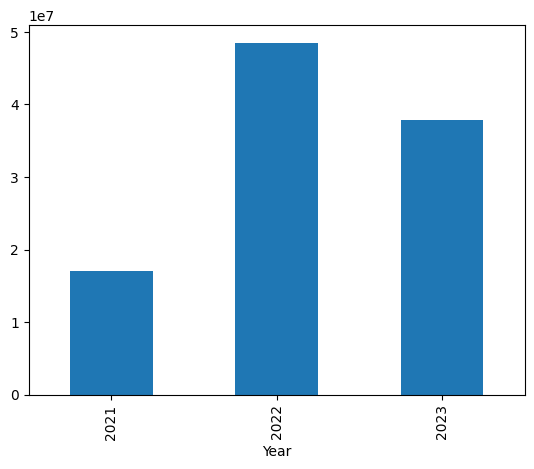

In [80]:
# Yearly VWAP of Maruti Stocks

df_vwap_sofi.groupby('Year')['Volume'].mean().plot.bar()

<Axes: xlabel='Month'>

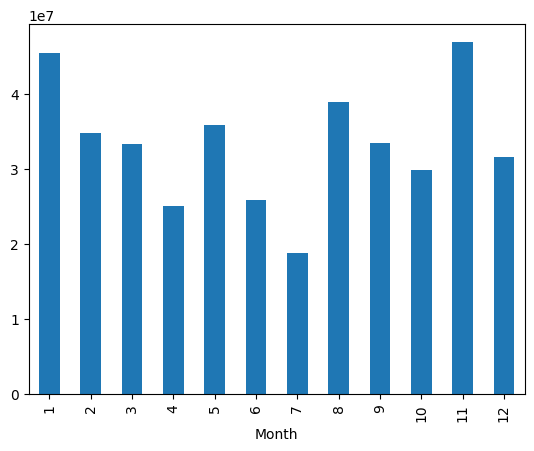

In [89]:
# Yearly VWAP of Maruti Stocks

df_vwap_sofi.groupby('Month')['Volume'].mean().plot.bar()

In [64]:
df_vwap_nio = df_vwap[["Date", "Volume"]].where(df_vwap.company == "NIO")
df_vwap_nio.dropna(inplace=True)
df_vwap_nio = extract_date_features(df_vwap_nio)

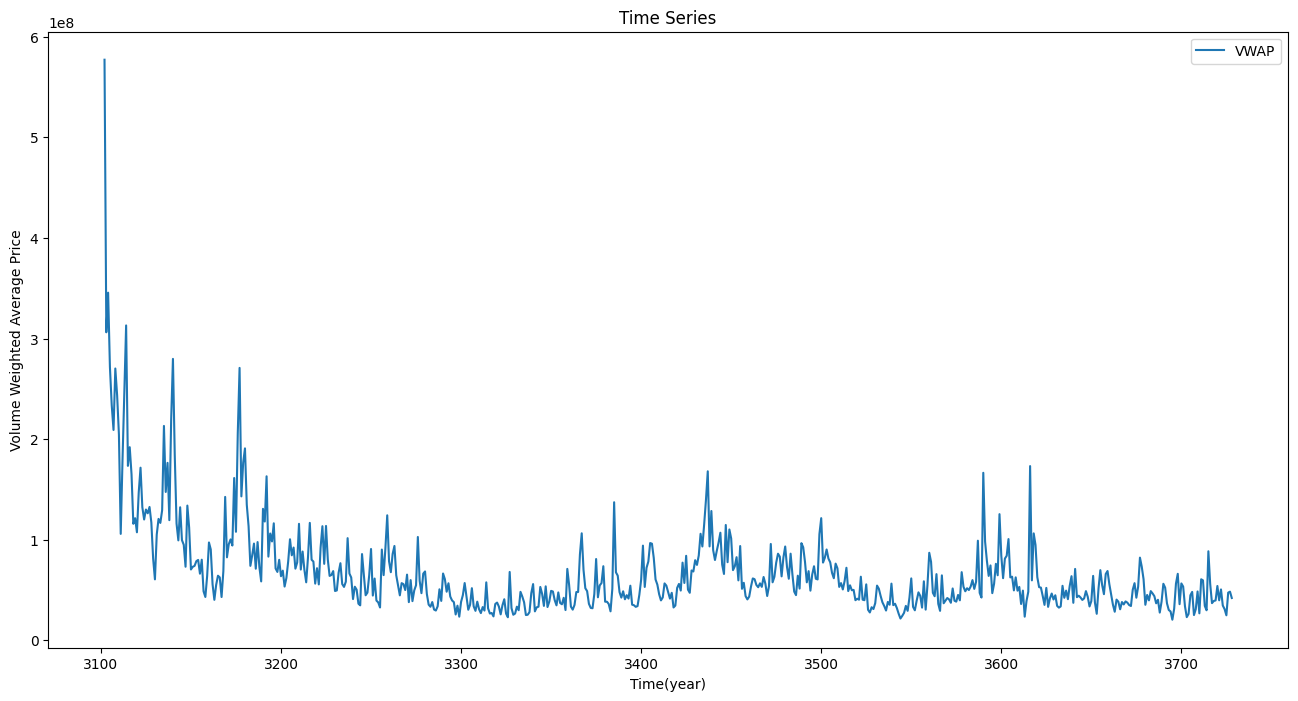

In [73]:
# Visualising the VWAP 

plt.figure(figsize=(16,8)) 
plt.plot(df_vwap_nio['Volume'], label='VWAP') 
plt.title('Time Series') 
plt.xlabel("Time(year)") 
plt.ylabel("Volume Weighted Average Price") 
plt.legend(loc='best')

<Axes: xlabel='Year'>

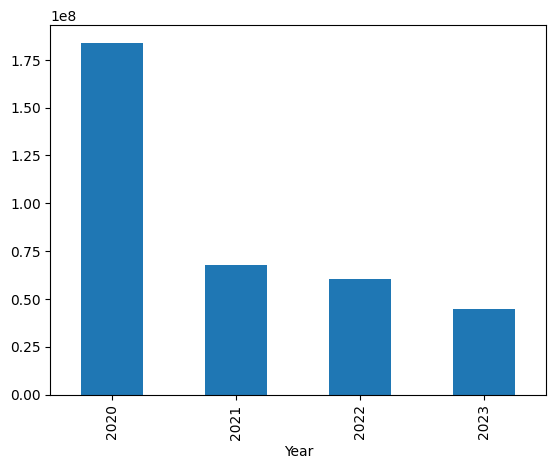

In [81]:
# Yearly VWAP of Maruti Stocks

df_vwap_nio.groupby('Year')['Volume'].mean().plot.bar()

<Axes: xlabel='Month'>

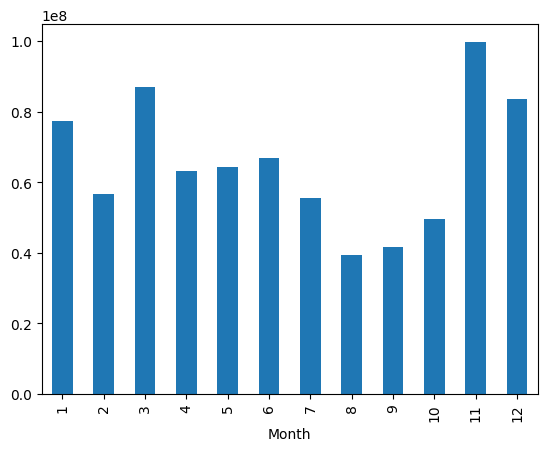

In [90]:
# Yearly VWAP of Maruti Stocks

df_vwap_nio.groupby('Month')['Volume'].mean().plot.bar()

In [65]:
df_vwap_aapl = df_vwap[["Date", "Volume"]].where(df_vwap.company == "AAPL")
df_vwap_aapl.dropna(inplace=True)
df_vwap_aapl = extract_date_features(df_vwap_aapl)

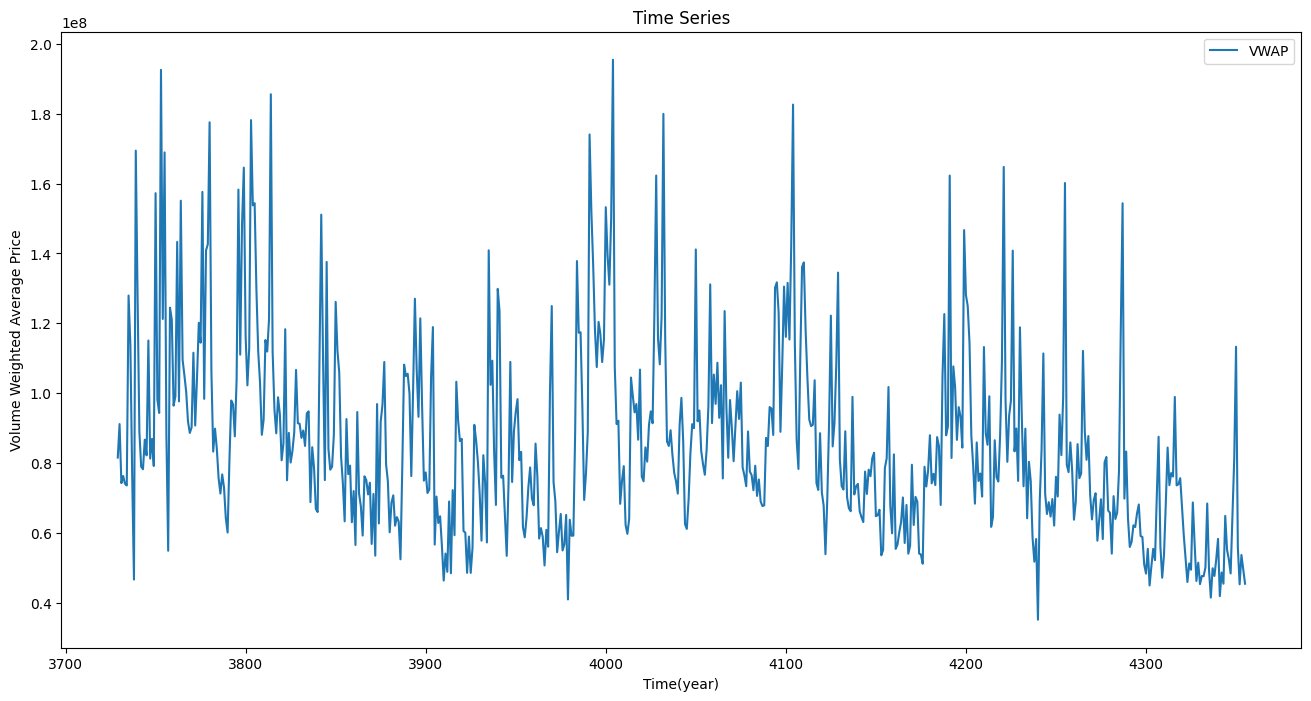

In [74]:
# Visualising the VWAP 

plt.figure(figsize=(16,8)) 
plt.plot(df_vwap_aapl['Volume'], label='VWAP') 
plt.title('Time Series') 
plt.xlabel("Time(year)") 
plt.ylabel("Volume Weighted Average Price") 
plt.legend(loc='best')

<Axes: xlabel='Year'>

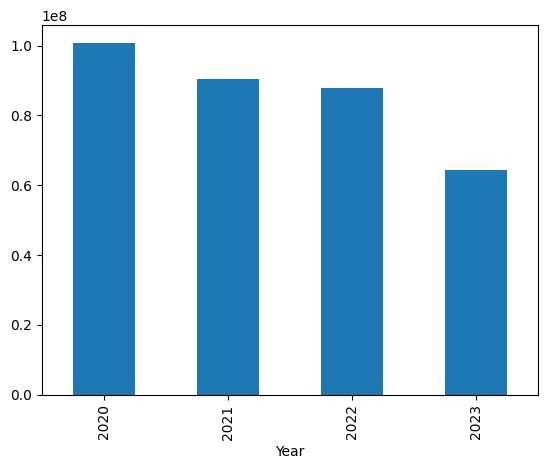

In [82]:
# Yearly VWAP of Maruti Stocks

df_vwap_aapl.groupby('Year')['Volume'].mean().plot.bar()

<Axes: xlabel='Month'>

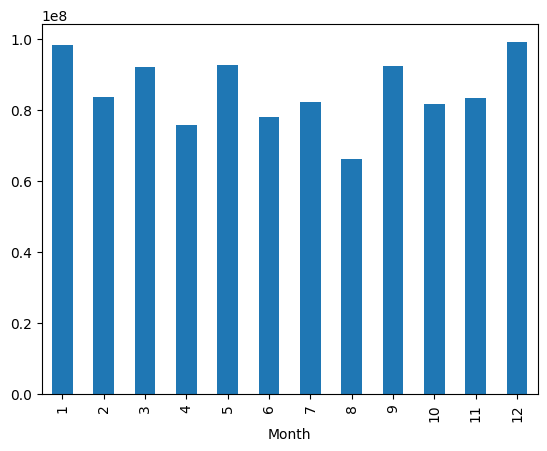

In [92]:
# Yearly VWAP of Maruti Stocks

df_vwap_aapl.groupby('Month')['Volume'].mean().plot.bar()

In [66]:
df_vwap_googl = df_vwap[["Date", "Volume"]].where(df_vwap.company == "GOOGL")
df_vwap_googl.dropna(inplace=True)
df_vwap_googl = extract_date_features(df_vwap_googl)

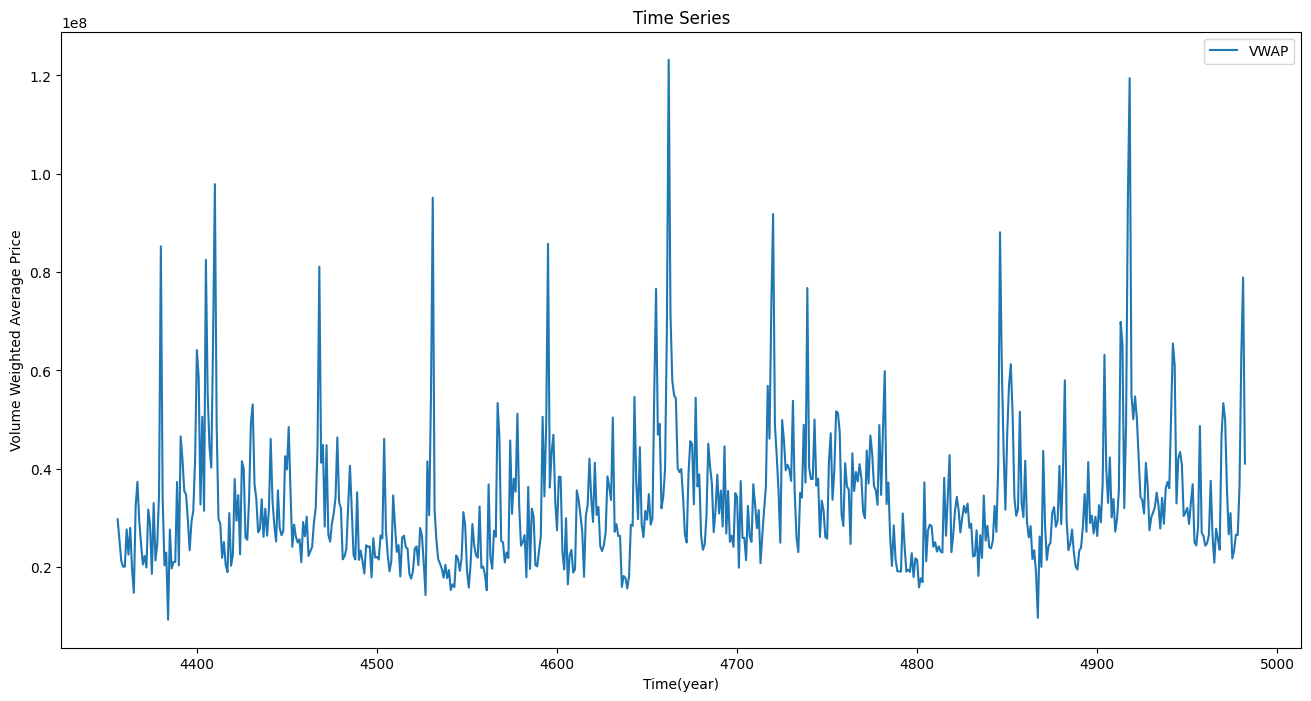

In [75]:
# Visualising the VWAP 

plt.figure(figsize=(16,8)) 
plt.plot(df_vwap_googl['Volume'], label='VWAP') 
plt.title('Time Series') 
plt.xlabel("Time(year)") 
plt.ylabel("Volume Weighted Average Price") 
plt.legend(loc='best')

<Axes: xlabel='Year'>

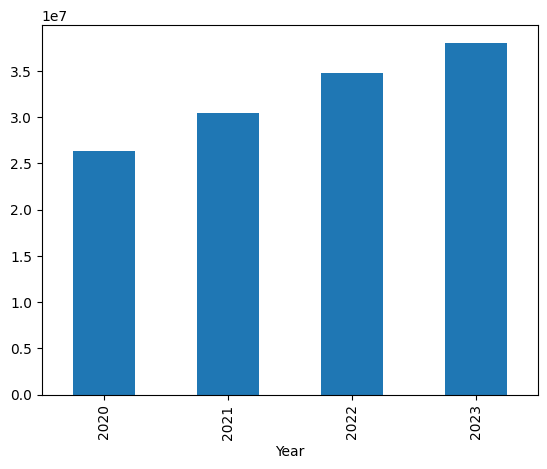

In [83]:
# Yearly VWAP of Maruti Stocks

df_vwap_googl.groupby('Year')['Volume'].mean().plot.bar()

<Axes: xlabel='Month'>

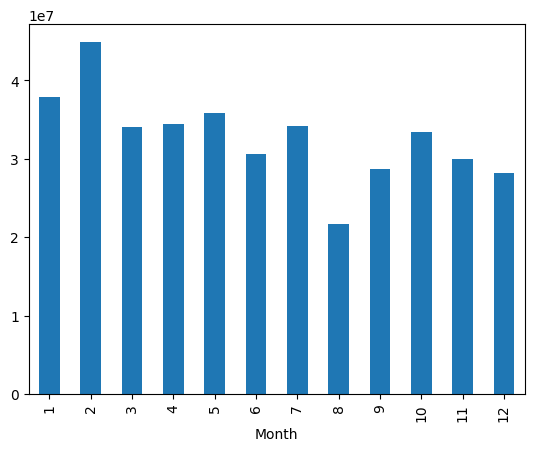

In [93]:
# Yearly VWAP of Maruti Stocks

df_vwap_googl.groupby('Month')['Volume'].mean().plot.bar()

<Axes: xlabel='Day'>

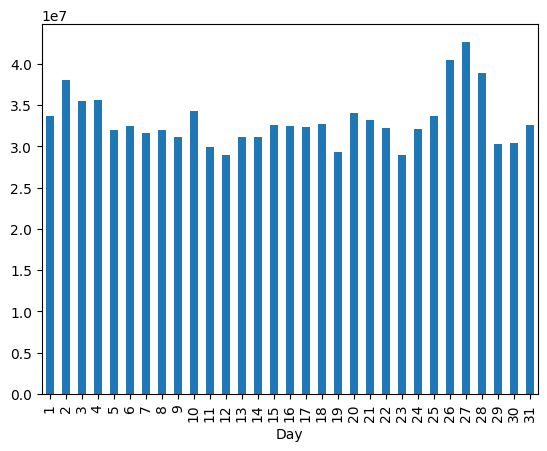

In [94]:
# Yearly VWAP of Maruti Stocks

df_vwap_googl.groupby('Day')['Volume'].mean().plot.bar()